# K-means

In [23]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Generate data

In [67]:
# Generate Data
points = np.genfromtxt('Skin_NonSkin.txt', delimiter = '\t')

In [74]:
def normilize1(points):
    return (points[:, 0] - points.mean(axis=1))/points.std(axis=1)

In [75]:
def normilize2(points):
    return (points[:, 0] - points.min(axis=1))/(points.max(axis=1) - points.min(axis=1))

In [78]:
print(points)

[[  74.   85.  123.    1.]
 [  73.   84.  122.    1.]
 [  72.   83.  121.    1.]
 ..., 
 [ 163.  162.  112.    2.]
 [ 163.  162.  112.    2.]
 [ 255.  255.  255.    2.]]


### Main functions

In [46]:
def initialize_centroids(points, k):
    '''
        Selects k random points as initial
        points from dataset
    '''
    indices = np.random.permutation(points.shape[0])
    return points[indices[:k]]

In [47]:
initialize_centroids(points, 3)

array([[  58.,   58.,   10.,    2.],
       [ 180.,  180.,  140.,    2.],
       [   3.,    3.,    0.,    2.]])

In [48]:
def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    dists = np.sqrt(((points-centroids[:, np.newaxis])**2).sum(axis=2))
    
    return np.argmin(dists, axis=0)

In [49]:
centroids = initialize_centroids(points, 3)
print("centroids", centroids)
print("points", points)
print((points-centroids[:, np.newaxis]).shape)
closest = closest_centroid(points, centroids)
    
print(closest)

centroids [[ 178.  178.  132.    2.]
 [ 198.  198.  158.    2.]
 [ 185.  184.  140.    2.]]
points [[  74.   85.  123.    1.]
 [  73.   84.  122.    1.]
 [  72.   83.  121.    1.]
 ..., 
 [ 163.  162.  112.    2.]
 [ 163.  162.  112.    2.]
 [ 255.  255.  255.    2.]]
(3, 245057, 4)
[0 0 0 ..., 0 0 1]


In [50]:
def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==i].mean(axis=0) for i in range(centroids.shape[0])])

In [51]:
print(centroids.shape[0])
for i in range(centroids.shape[0]):
    print (points[closest==i].mean(axis=0))
print(points[:3].mean(axis=0))

3
[ 107.36034336  112.60573362   97.64790492    1.85744078]
[ 179.12889336  193.79714286  204.51732394    1.58146881]
[ 164.02327118  174.40368522  166.99970636    1.69534576]
[  73.   84.  122.    1.]


In [52]:
def main(points):
    num_iterations = 100
    k = 3
        
    # Initialize centroids
    centroids = initialize_centroids(points, k)
    
    # Run iterative process
    for i in range(num_iterations):
        closest = closest_centroid(points, centroids)
        centroids = move_centroids(points, closest, centroids)
    
    return centroids

In [53]:
centroids = main(points)

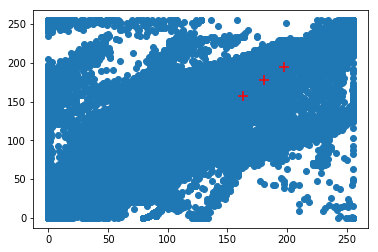

In [58]:
centroids = initialize_centroids(points, 3)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r',  marker='+', s=100)
ax = plt.gca()

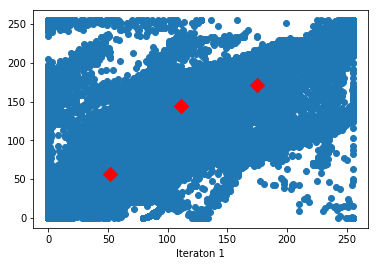

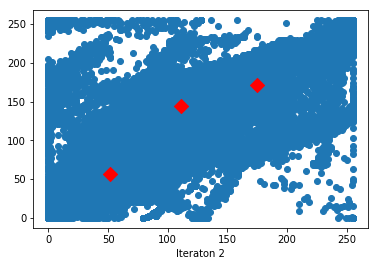

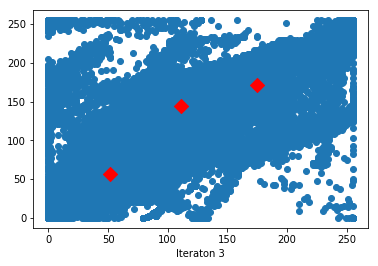

In [64]:
num_of_iteration = 3
for i in range(num_of_iteration):
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)

    plt.scatter(points[:, 0], points[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='D', s=100)
    ax = plt.gca()
    lable = 'Iteraton ' + str(i + 1)
    plt.xlabel(lable)
    plt.show()